<a href="https://colab.research.google.com/github/shubh-ag/PHI/blob/master/PHI_separate_stress_types_4Hz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/shubh-ag/PHI

Cloning into 'PHI'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 80 (delta 21), reused 67 (delta 18), pack-reused 0
Unpacking objects: 100% (80/80), done.


In [2]:
%cd /content/PHI/data/utd

/content/PHI/data/utd


In [3]:
#IMPORTS
import pandas as pd
import numpy as np
import os
from pandas import read_csv
import statistics
from sklearn.model_selection import train_test_split

In [4]:
# Create data frame using EDA data
data = []
for i in os.listdir():
  temp = read_csv(i+"/"+i+"AccTempEDA.csv")
  temp = temp.drop(['Hour','Minute','Second'], axis=1)
  interval = 8 #4Hz and we combine data for 2 secs
  subject_data = []
  for j in range(0, len(temp) - interval, interval):
    d = temp[j:j+interval]
    d_np = d.to_numpy()[:,:-1]
    minimum = np.amin(d_np, axis = 0).astype(float)
    maximum = np.amax(d_np, axis = 0).astype(float)
    average = np.average(d_np, axis = 0).astype(float)
    values, counts = np.unique(d['Label'], return_counts=True)
    mode = values[np.argmax(counts)]
    df = []
    df.extend(np.around(minimum, decimals=4))
    df.extend(np.around(maximum, 4))
    df.extend(np.around(average, 4))
    df.append(mode)
    subject_data.append(np.nan_to_num(df))
  
  # z_scores = []
  # for c in range(len(subject_data[0])):
  #   # print(len(subject_data[:,c]))
  #   # print(np.average(subject_data[:, c]))
  #   print(len((subject_data[:,c] - np.average(subject_data[:, c])) / np.std(subject_data[:,c])))
  # # (df[col] - df[col].mean())/df[col].std(ddof=0)
  data.extend(subject_data)



df = pd.DataFrame(data, columns=["min_acc_z","min_acc_x","min_acc_y","min_temp", "min_eda",
                             "max_acc_z","max_acc_x","max_acc_y","max_temp", "max_eda",
                             "avg_acc_z","avg_acc_x","avg_acc_y","avg_temp", "avg_eda",
                             "label"])

In [5]:
df_y = df['label']
df_x = df.drop(['label'], axis=1)

X_train, X_test, y_train, y_test  = train_test_split(df_x, df_y, test_size=0.2)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

36871
9218
36871
9218


In [6]:
df

,min_acc_z,min_acc_x,min_acc_y,min_temp,min_eda,max_acc_z,max_acc_x,max_acc_y,max_temp,max_eda,avg_acc_z,avg_acc_x,avg_acc_y,avg_temp,avg_eda,label
0,0.0,-0.23,-0.81,27.9,0.238,0.02,-0.21,-0.8,28.1,0.242,0.0112,-0.2225,-0.8038,27.925,0.2392,Relax
1,0.0,-0.23,-0.81,27.9,0.241,0.01,-0.22,-0.79,28.1,0.246,0.0012,-0.2225,-0.8025,27.925,0.2432,Relax
2,0.0,-0.24,-0.8,27.9,0.244,0.01,-0.22,-0.8,27.9,0.247,0.0075,-0.2338,-0.8,27.9,0.2461,Relax
3,0.0,-0.24,-0.8,27.9,0.244,0.01,-0.23,-0.79,28.1,0.247,0.0075,-0.2338,-0.7962,28.0,0.2465,Relax
4,0.0,-0.25,-0.81,27.9,0.244,0.01,-0.22,-0.8,28.1,0.247,0.0012,-0.235,-0.8012,28.0,0.2464,Relax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46084,-0.26,-0.99,-0.15,33.1,4.636,-0.25,-0.99,-0.14,33.1,4.675,-0.255,-0.99,-0.1413,33.1,4.6458,Relax
46085,-0.26,-0.99,-0.15,33.1,4.636,-0.25,-0.98,-0.14,33.1,4.636,-0.2538,-0.9888,-0.1425,33.1,4.636,Relax
46086,-0.26,-0.99,-0.15,33.1,4.63,-0.25,-0.98,-0.14,33.1,4.636,-0.2538,-0.9862,-0.1413,33.1,4.6345,Relax
46087,-0.26,-0.99,-0.15,33.1,4.63,-0.25,-0.98,-0.14,33.1,4.662,-0.2562,-0.9888,-0.1438,33.1,4.6355,Relax


In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid featu

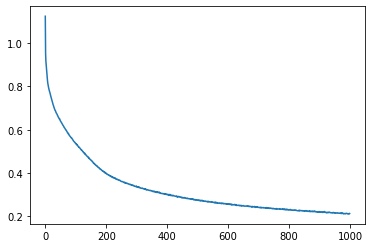

0.9236437611742091


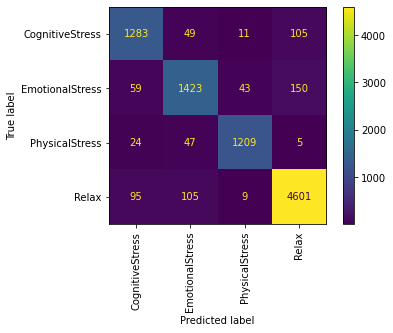

In [8]:
clf = MLPClassifier(random_state=1, max_iter=1000, activation='logistic', n_iter_no_change=100, tol=1e-24, early_stopping=True).fit(X_train, y_train)

plt.plot(clf.loss_curve_)
plt.show()
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')

0.6156695602531981


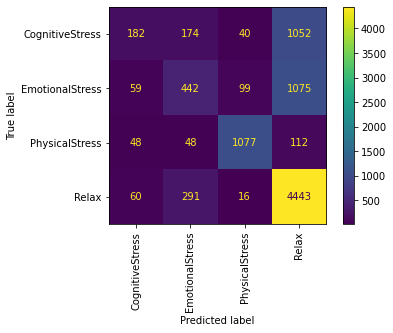

In [9]:
clf = LogisticRegression(random_state=1, max_iter=500, solver='newton-cg').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')